In [3]:
from google.colab import drive

drive.mount("/content/gdrive")  
!pwd  # show current path 

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content


In [4]:
%cd "/content/gdrive/MyDrive/ClasesMachineLearning"
!ls  # show current directory

/content/gdrive/MyDrive/ClasesMachineLearning
Arboles.ipynb		   iris.data	       Ses03_Practice.ipynb
brain_stroke.csv	   MR2Framework.ipynb  Untitled
ChallengeSemana2.ipynb	   MR2.ipynb	       Valhalla23.csv
fifa_eda_stats.csv	   PlayDataset.csv     wine.data
international_matches.csv  Semana3.ipynb       wine.names


In [5]:
import numpy as np
from random import randrange
import matplotlib.pyplot as plt
import math
import pandas as pd
import seaborn as sn

In [177]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor, RandomForestClassifier
from sklearn.svm import SVR, NuSVR
from sklearn.gaussian_process import GaussianProcessRegressor

In [178]:
df = pd.read_csv('fifa_eda_stats.csv')
#df = pd.read_csv('wine.data')
df.head(1)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M


In [179]:
def transform(value):
  aux=None
  if (type(value)==str):
    value = value.replace("€","")
    if ("M" in value):
      aux = (value.replace("M",""))
      aux=float(aux)*1000
    if ("K" in value):
      aux = (value.replace("K",""))
      aux=float(aux)*1
  else:
    aux=value
  return aux

In [180]:
df = pd.read_csv('fifa_eda_stats.csv')
#df = pd.read_csv('wine.data')
df.head(1)
df = df.drop(["Name","Club","Nationality","ID","Work Rate","Body Type","Position","Position","Jersey Number","Joined"],axis=1)
df = df.drop(["Loaned From","Contract Valid Until","GKReflexes","GKPositioning","GKKicking","GKHandling","GKDiving"],axis=1)
df = df.drop(["SlidingTackle","StandingTackle","Preferred Foot","Weight","Height","International Reputation","Release Clause"],axis=1)
df["Value"] = df["Value"].map(transform)
df["Wage"] = df["Wage"].map(transform)
df.head()

,Age,Overall,Potential,Value,Wage,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,...,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking
0,31,94,94,110500.0,565.0,4.0,4.0,84.0,95.0,70.0,...,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0
1,33,94,94,77000.0,405.0,4.0,5.0,84.0,94.0,89.0,...,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0
2,26,92,93,118500.0,290.0,5.0,5.0,79.0,87.0,62.0,...,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0
3,27,91,93,72000.0,260.0,3.0,1.0,17.0,13.0,21.0,...,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0
4,27,91,92,102000.0,355.0,5.0,4.0,93.0,82.0,55.0,...,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0


In [181]:
df.describe()

,Age,Overall,Potential,Value,Wage,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,...,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking
count,18207.000000,18207.000000,18207.000000,17955.000000,17966.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,25.122206,66.238699,71.307299,2444.530214,9.861850,2.947299,2.361308,49.734181,45.550911,52.298144,...,63.219946,65.311967,47.109973,55.868991,46.698276,49.958478,53.400903,48.548598,58.648274,47.281623
std,4.669943,6.908930,6.136496,5626.715434,22.117274,0.660456,0.756164,18.364524,19.525820,17.379909,...,15.894741,12.557000,19.260524,17.367967,20.696909,19.529036,14.146881,15.704053,11.436133,19.904397
min,16.000000,46.000000,48.000000,10.000000,1.000000,1.000000,1.000000,5.000000,2.000000,4.000000,...,12.000000,17.000000,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,3.000000,3.000000
25%,21.000000,62.000000,67.000000,325.000000,1.000000,3.000000,2.000000,38.000000,30.000000,44.000000,...,56.000000,58.000000,33.000000,44.000000,26.000000,38.000000,44.000000,39.000000,51.000000,30.000000
50%,25.000000,66.000000,71.000000,700.000000,3.000000,3.000000,2.000000,54.000000,49.000000,56.000000,...,66.000000,67.000000,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,53.000000
75%,28.000000,71.000000,75.000000,2100.000000,9.000000,3.000000,3.000000,64.000000,62.000000,64.000000,...,74.000000,74.000000,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000
max,45.000000,94.000000,95.000000,118500.000000,565.000000,5.000000,5.000000,93.000000,95.000000,94.000000,...,96.000000,97.000000,94.000000,95.000000,92.000000,95.000000,94.000000,92.000000,96.000000,94.000000


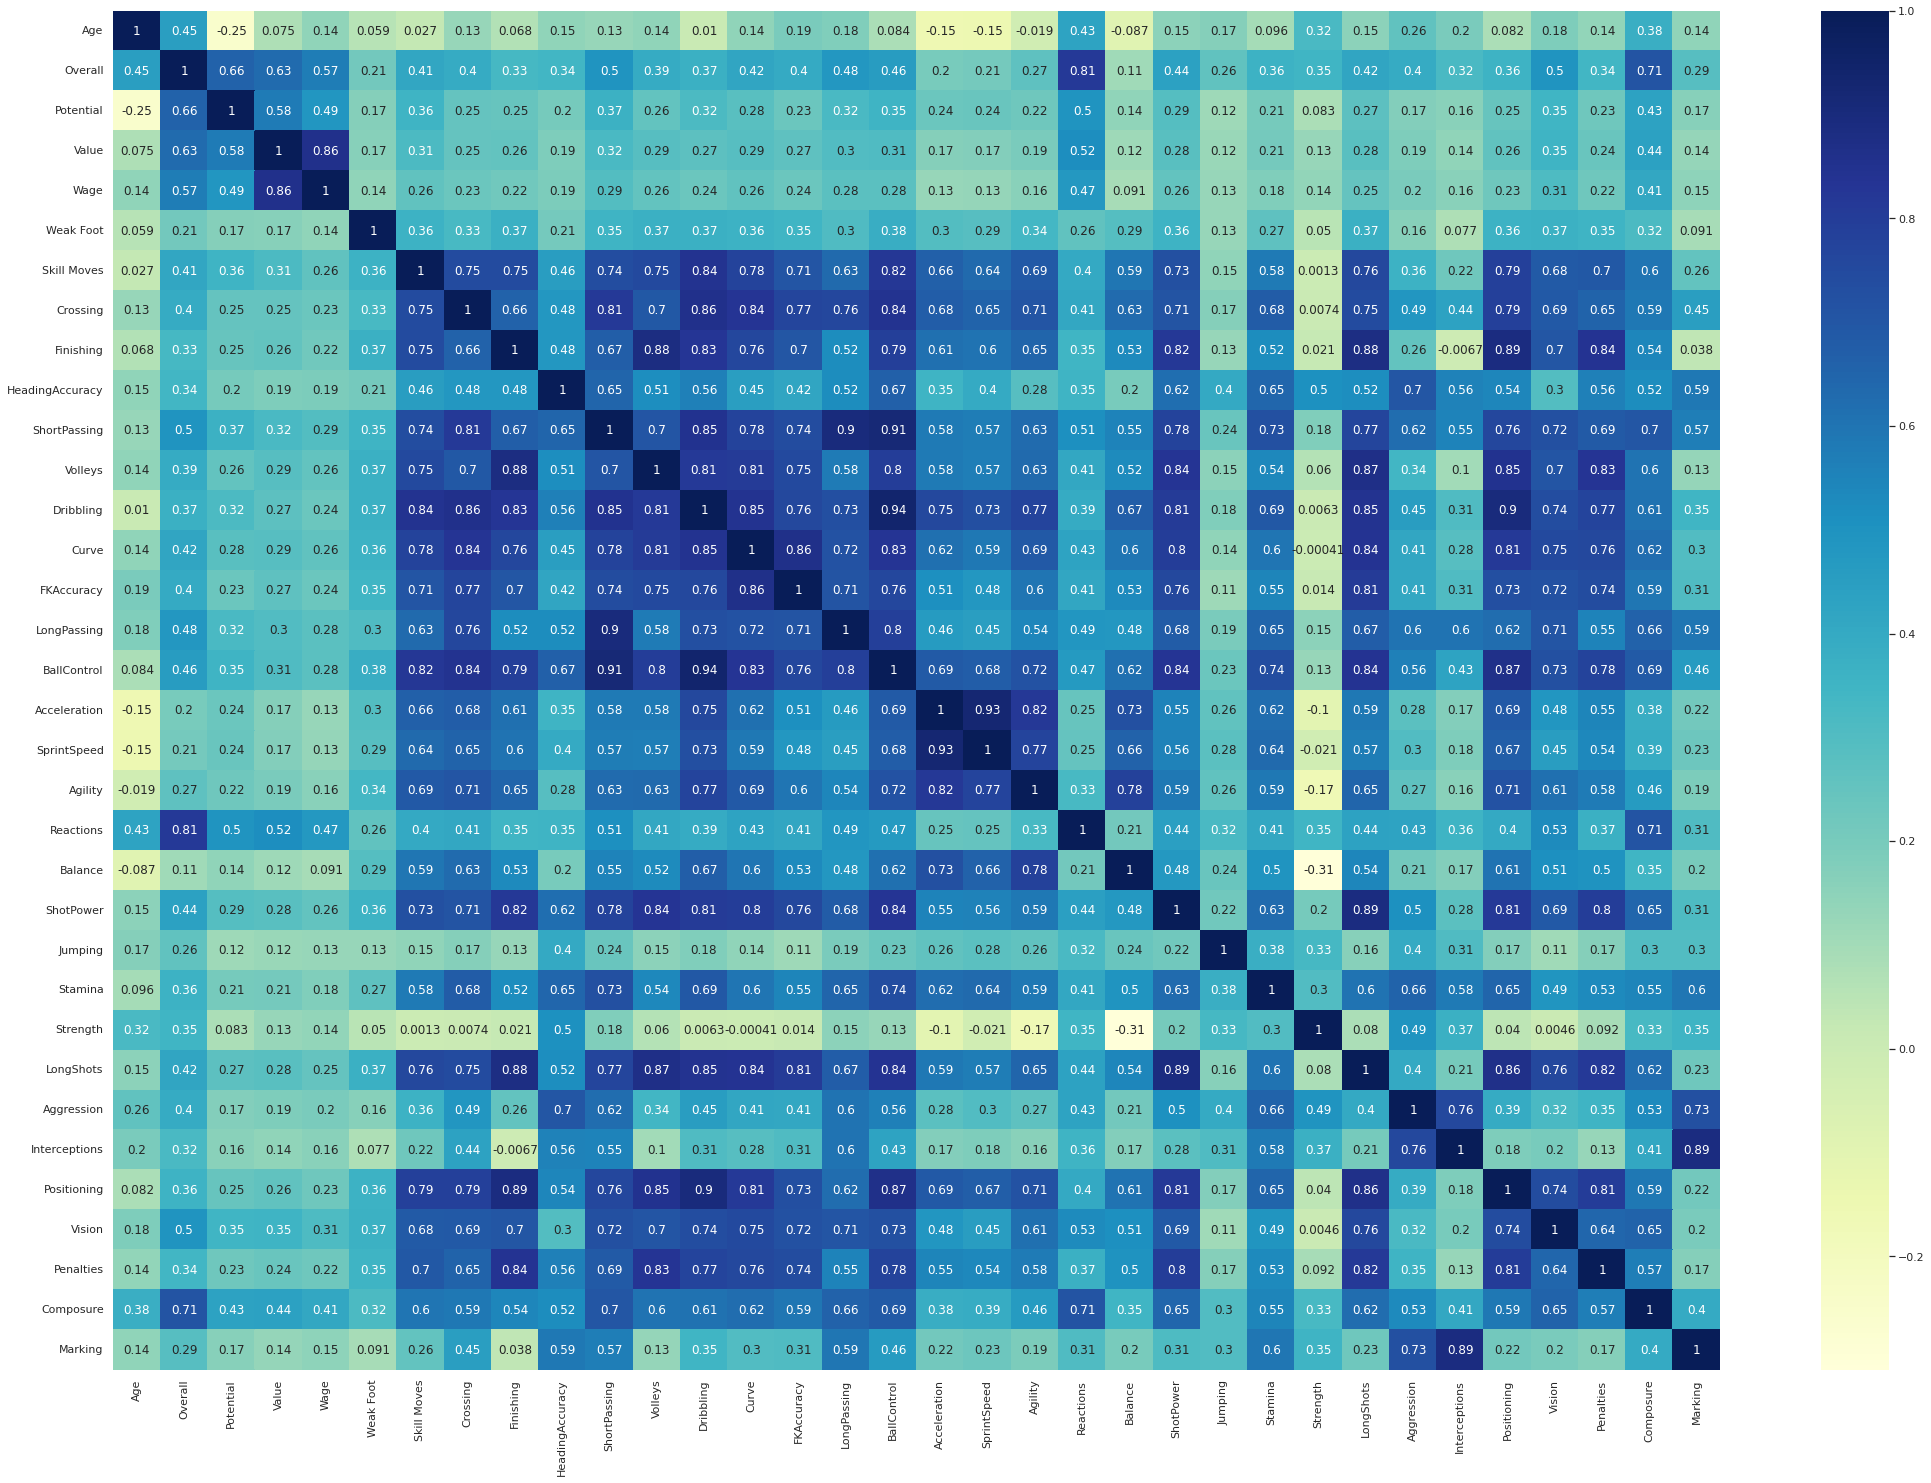

In [192]:
sn.set(rc = {'figure.figsize':(36,25)})
sn.heatmap(df.corr(), annot=True, cmap= 'YlGnBu')

In [183]:
df.fillna(0, inplace=True)
df.isnull().sum()

Age                0
Overall            0
Potential          0
Value              0
Wage               0
Weak Foot          0
Skill Moves        0
Crossing           0
Finishing          0
HeadingAccuracy    0
ShortPassing       0
Volleys            0
Dribbling          0
Curve              0
FKAccuracy         0
LongPassing        0
BallControl        0
Acceleration       0
SprintSpeed        0
Agility            0
Reactions          0
Balance            0
ShotPower          0
Jumping            0
Stamina            0
Strength           0
LongShots          0
Aggression         0
Interceptions      0
Positioning        0
Vision             0
Penalties          0
Composure          0
Marking            0
dtype: int64

In [184]:
df_x = df.drop(["Overall"],axis=1).values
df_y = df["Overall"].values
print(len(df_x))

18207


In [185]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, train_size = 0.60, random_state = 0)

In [186]:
randomF = RandomForestClassifier(criterion="entropy")

train=randomF.fit(x_train, y = y_train)
train_score = (randomF.score(x_train, y_train))
test_score = (randomF.score(x_test, y_test))
print(train_score,test_score)

1.0 0.6092269669092407


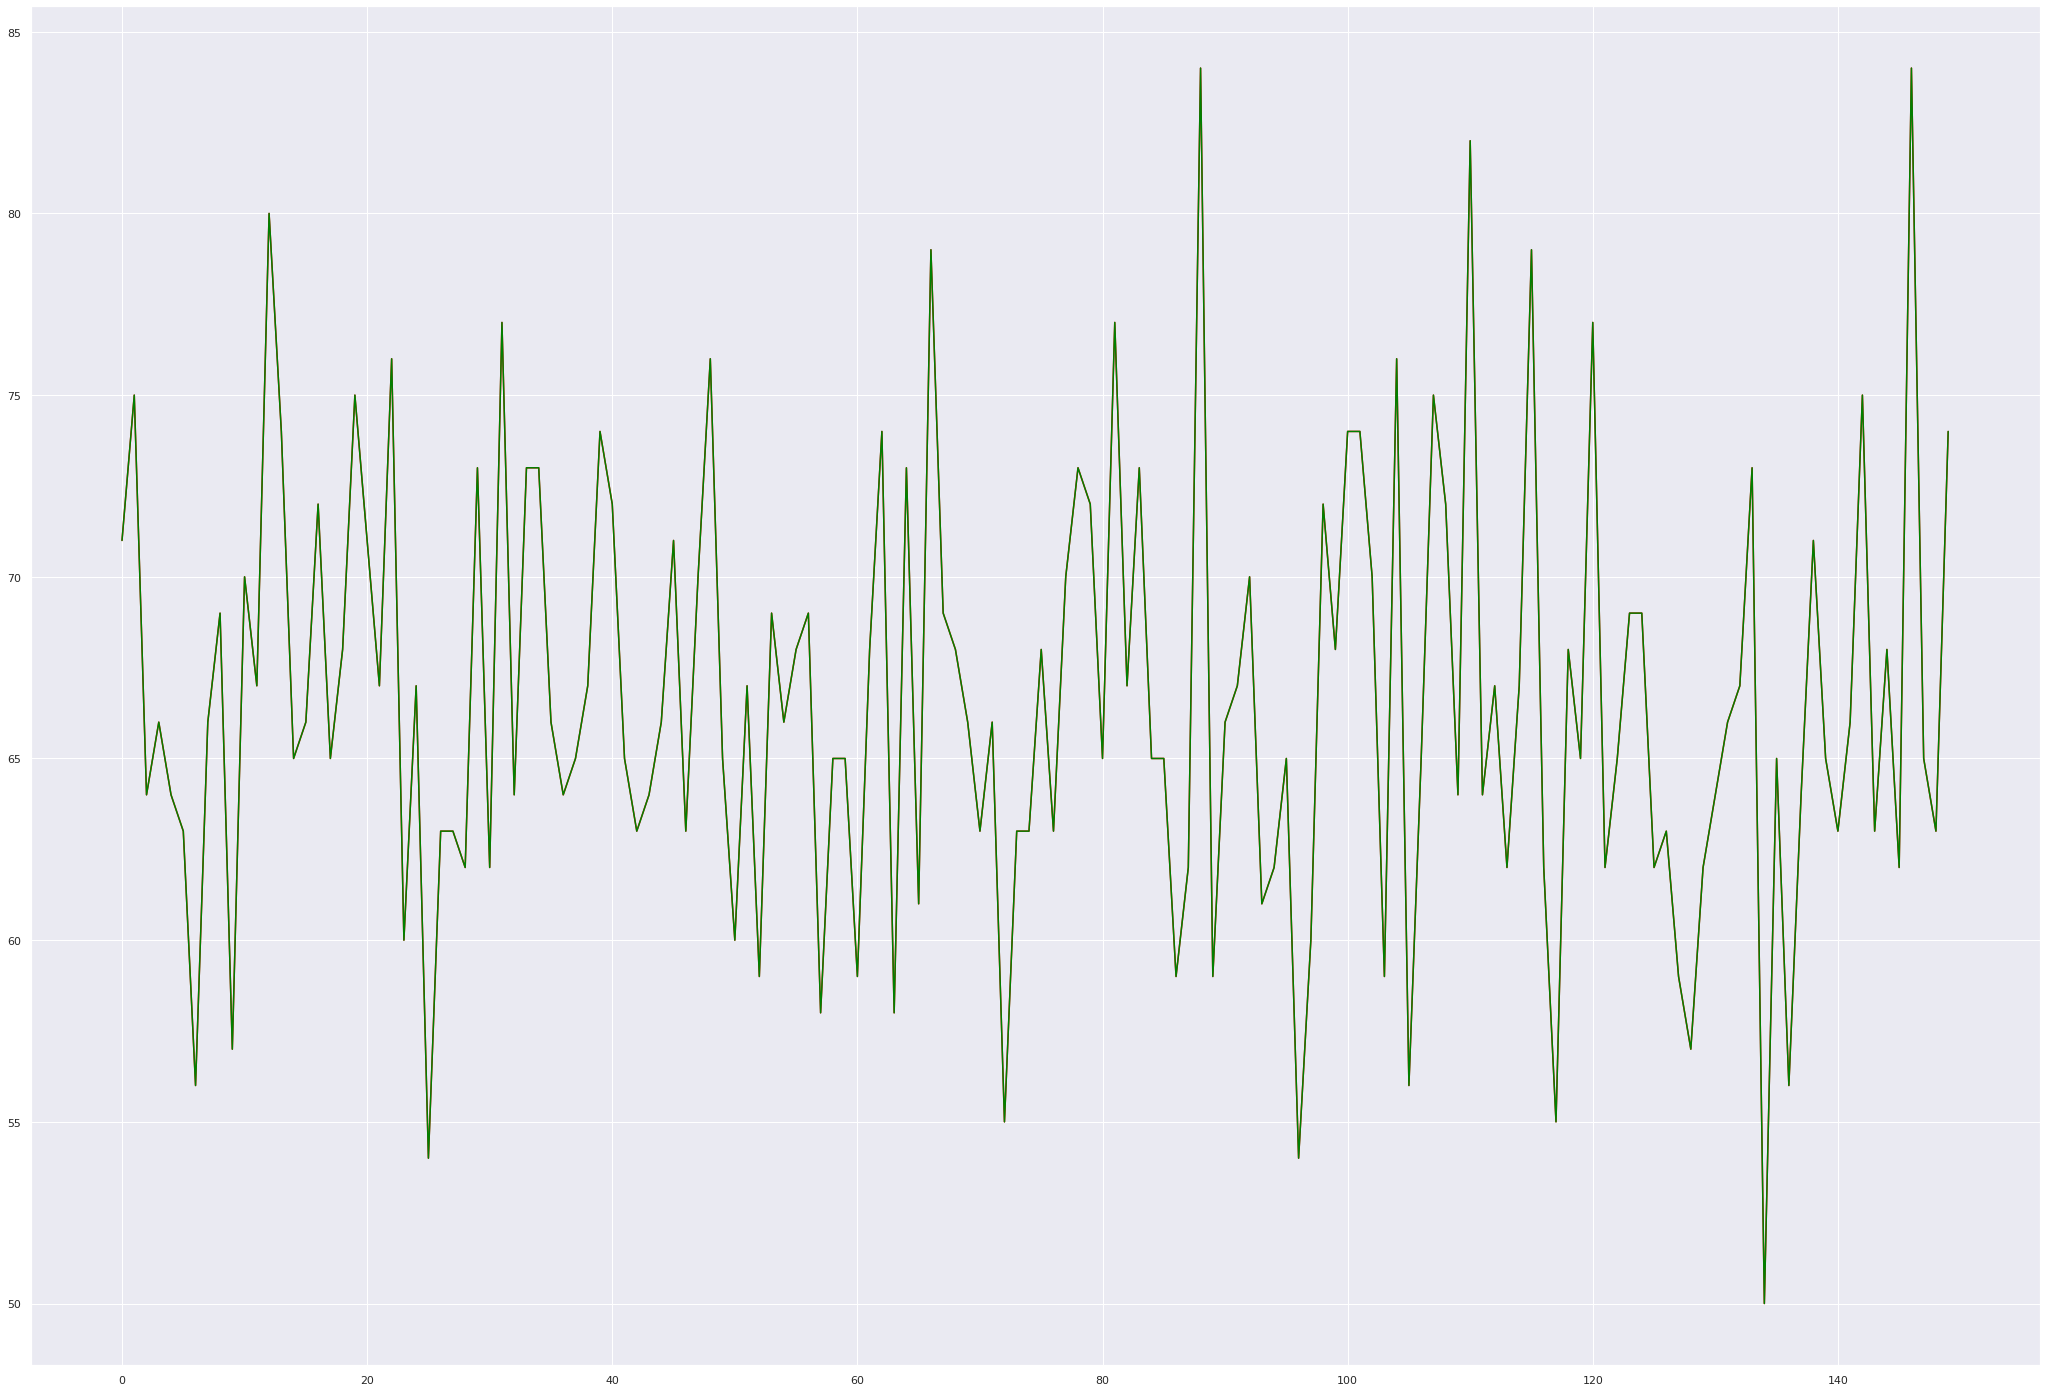

In [187]:
predictions = randomF.predict(x_train[:150])
plt.plot(predictions[:150],color="red")
plt.plot(y_train[:150],color="green")
plt.show()

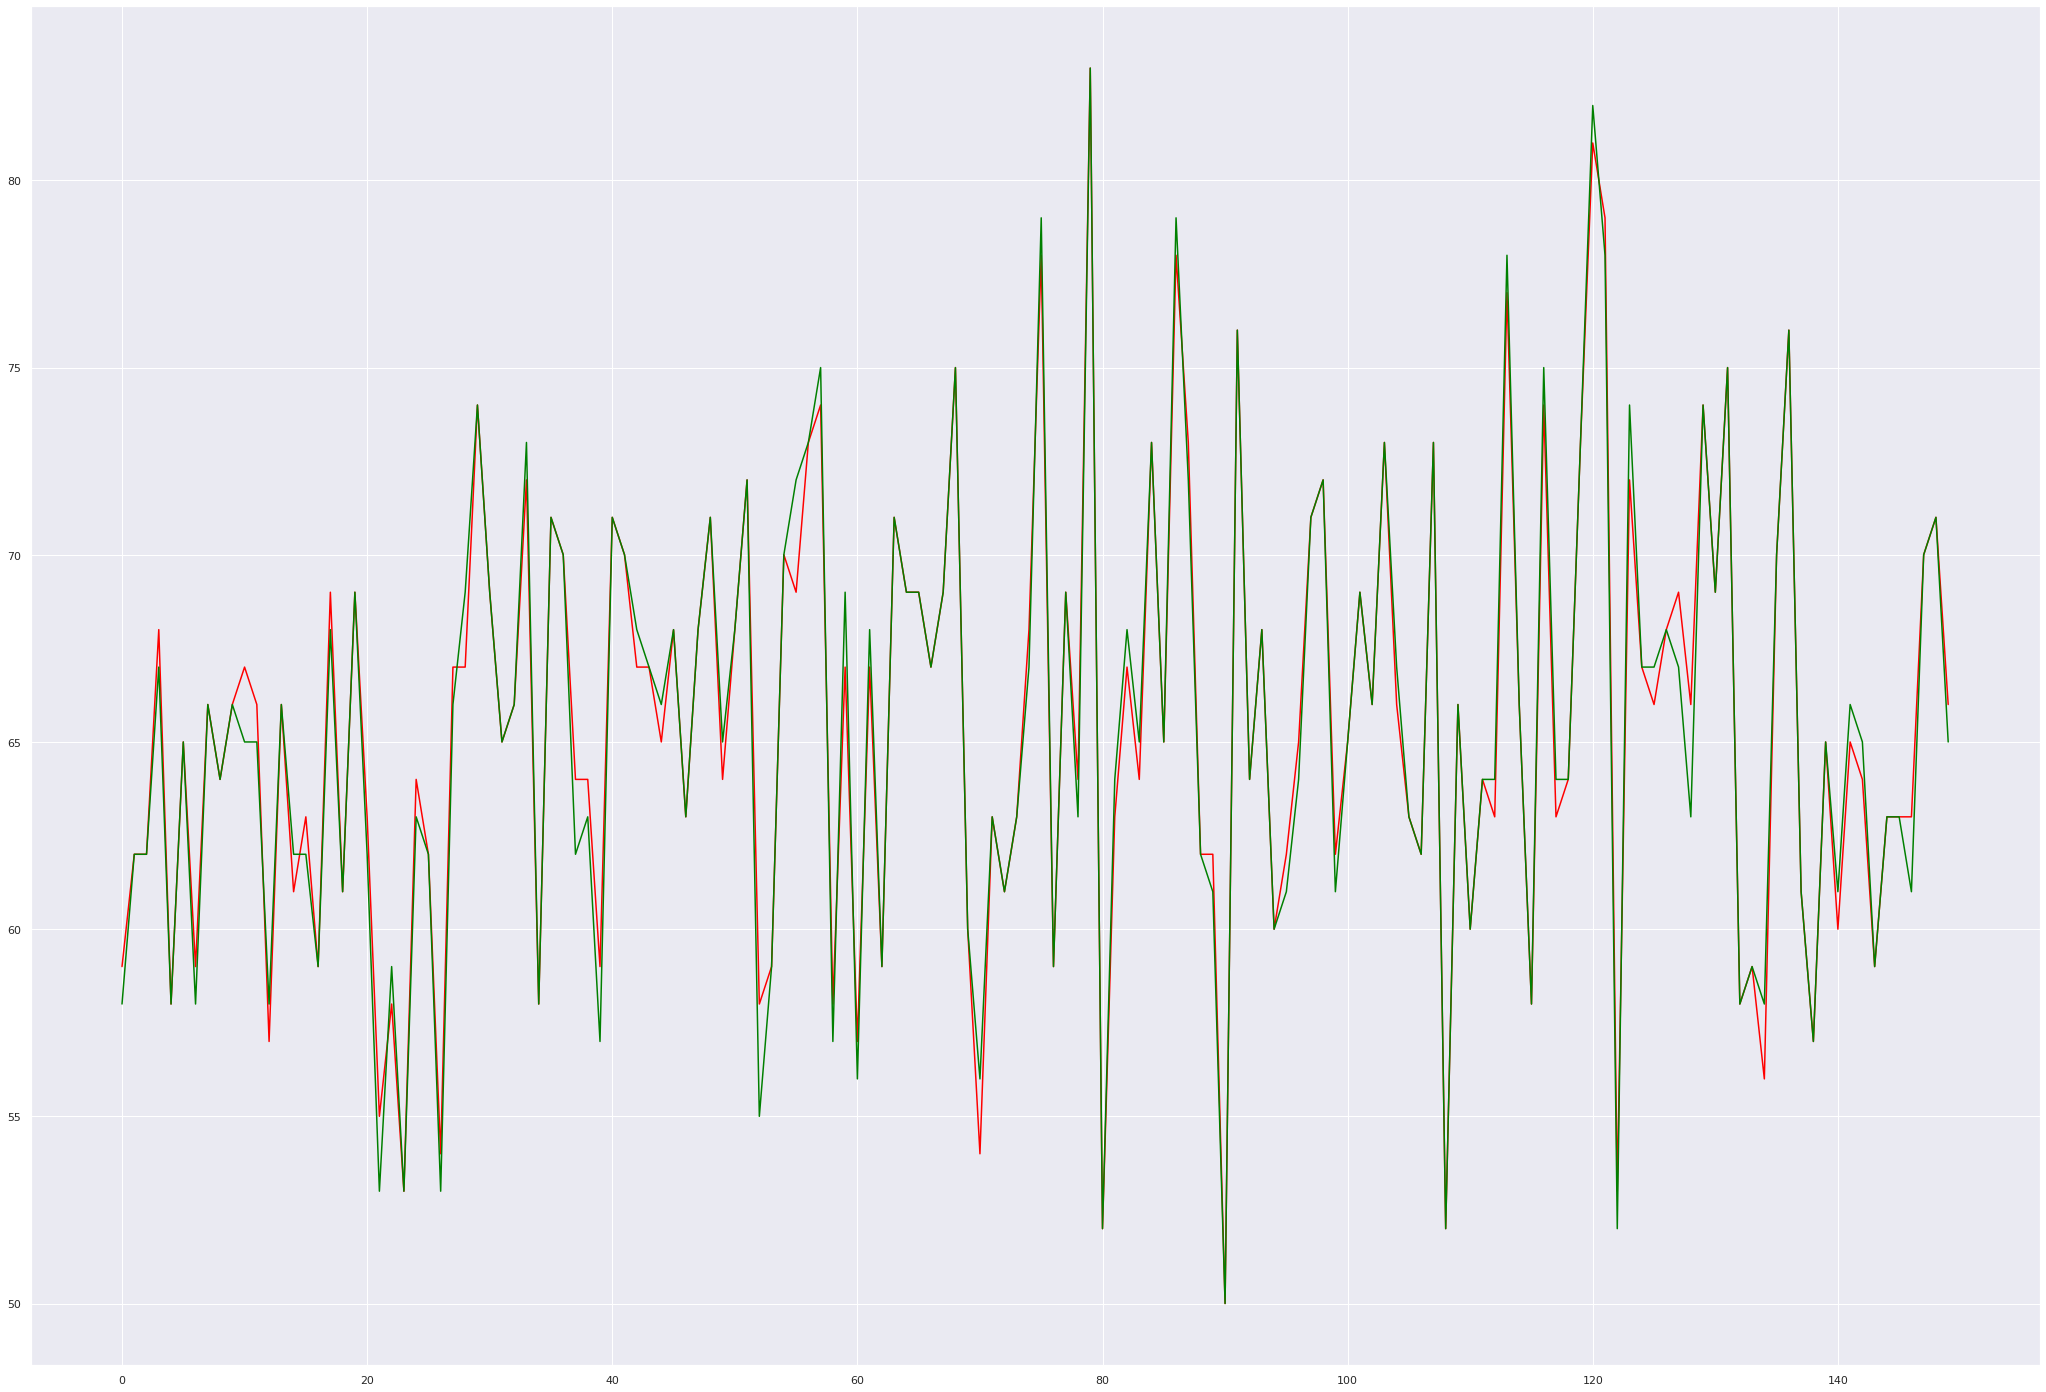

In [188]:
predictions = randomF.predict(x_test[:150])
plt.plot(predictions[:150],color="red")
plt.plot(y_test[:150],color="green")
plt.show()

In [189]:
regressor = (MLPRegressor(random_state = 0, activation = "relu", solver = "adam", 
                      hidden_layer_sizes = (35), alpha = 0.1, learning_rate = "adaptive", 
                      learning_rate_init = 0.1, max_iter = 1000))
train=regressor.fit(x_train, y = y_train)
train_score = (regressor.score(x_train, y_train))
test_score = (regressor.score(x_test, y_test))
print(train_score,test_score)

0.6619520852895947 0.6654034909152919


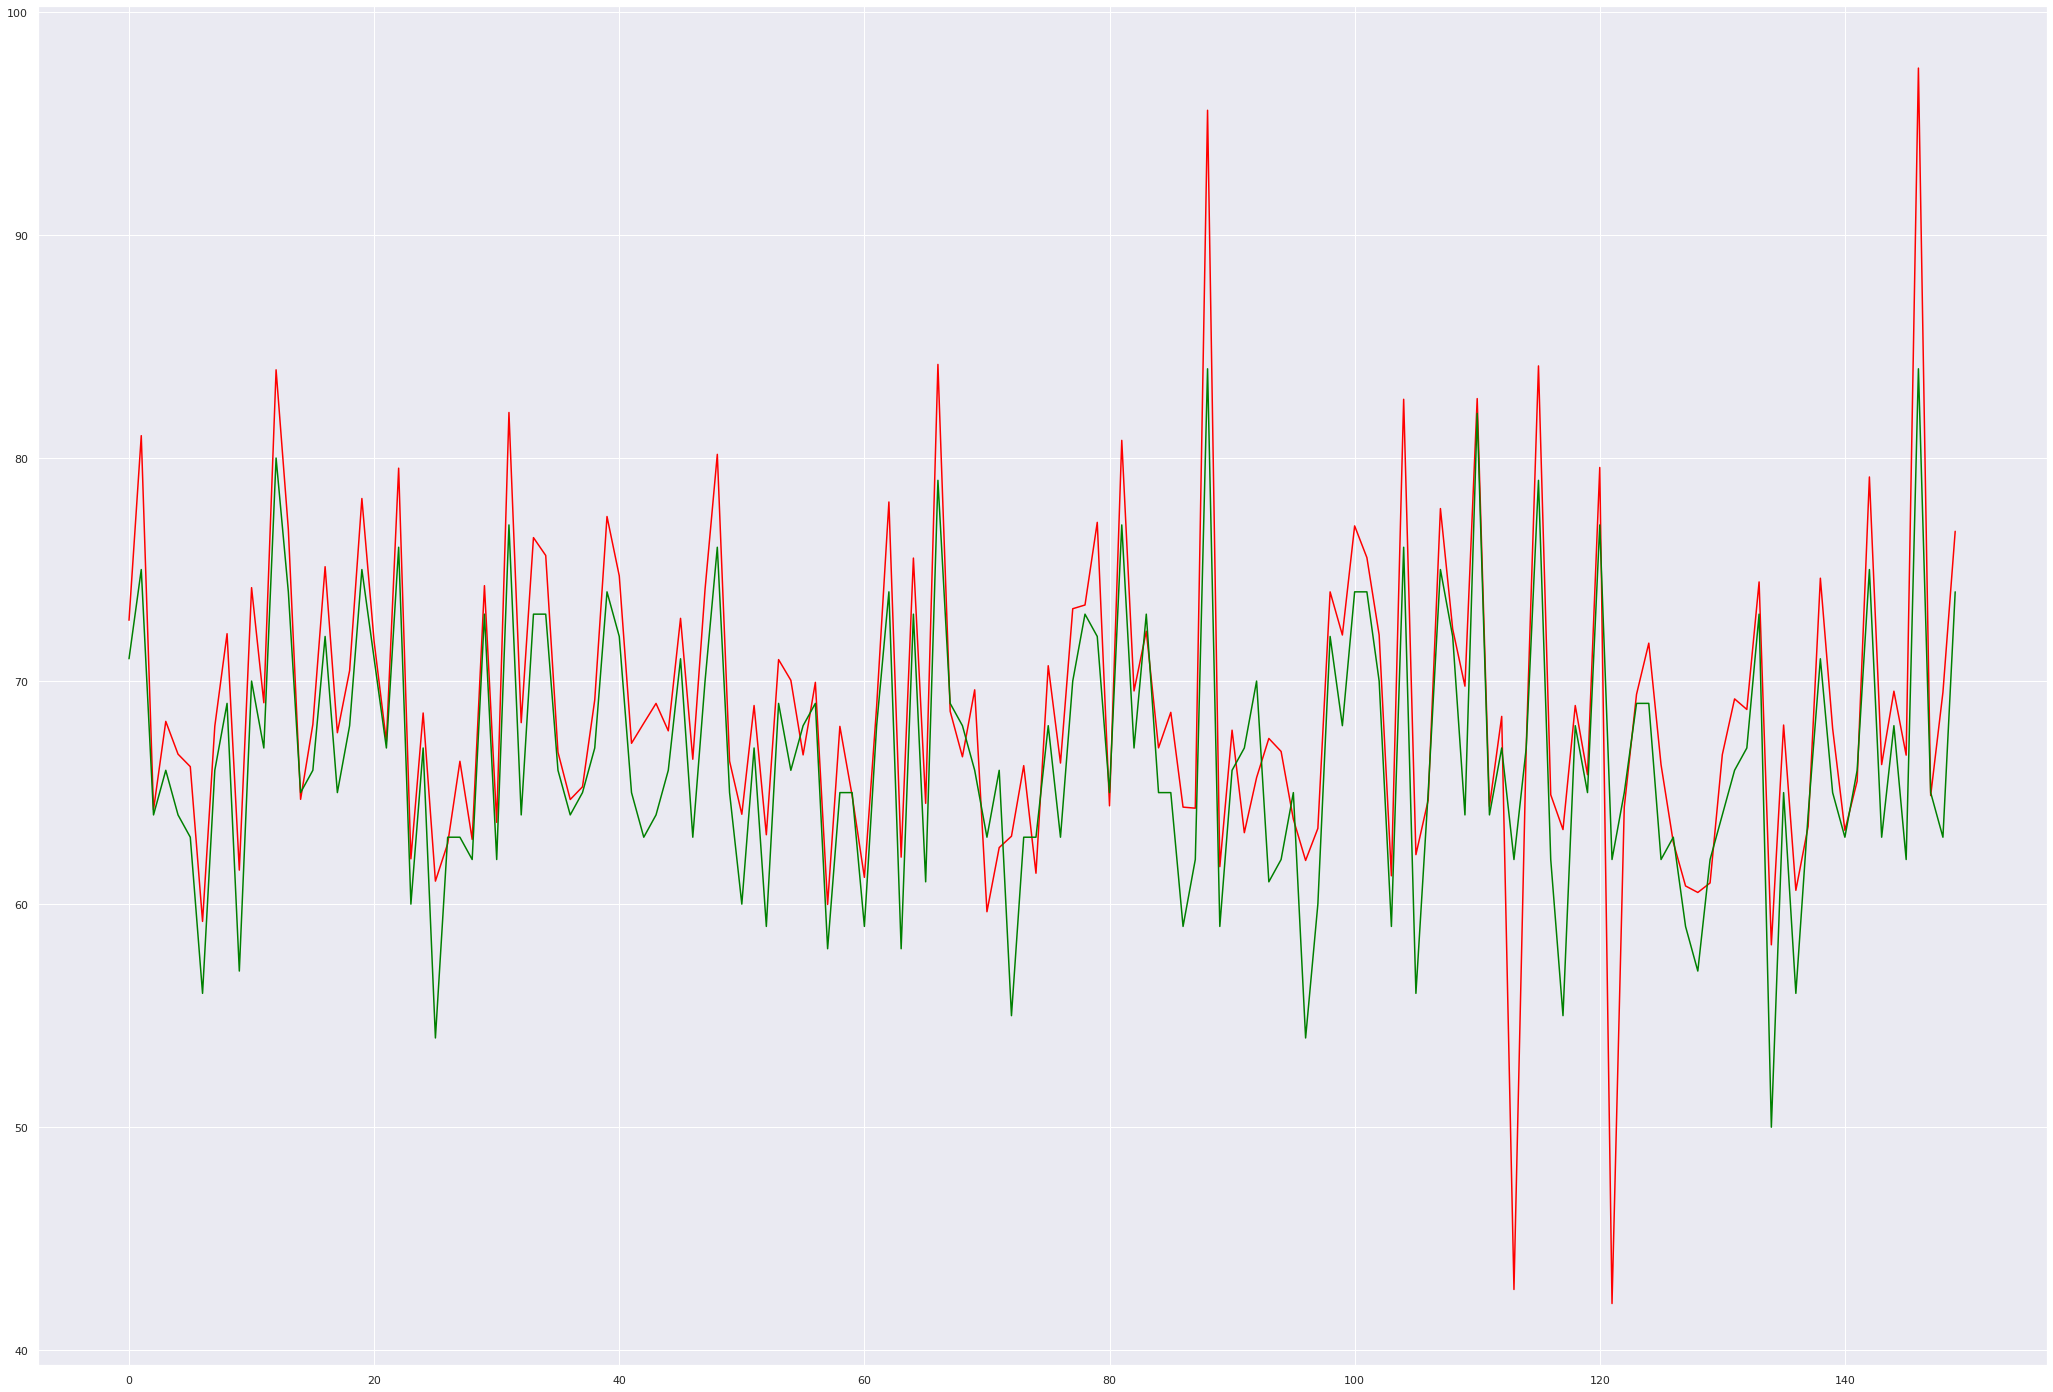

In [190]:
predictions = regressor.predict(x_train[:150])
plt.plot(predictions[:150],color="red")
plt.plot(y_train[:150],color="green")
plt.show()

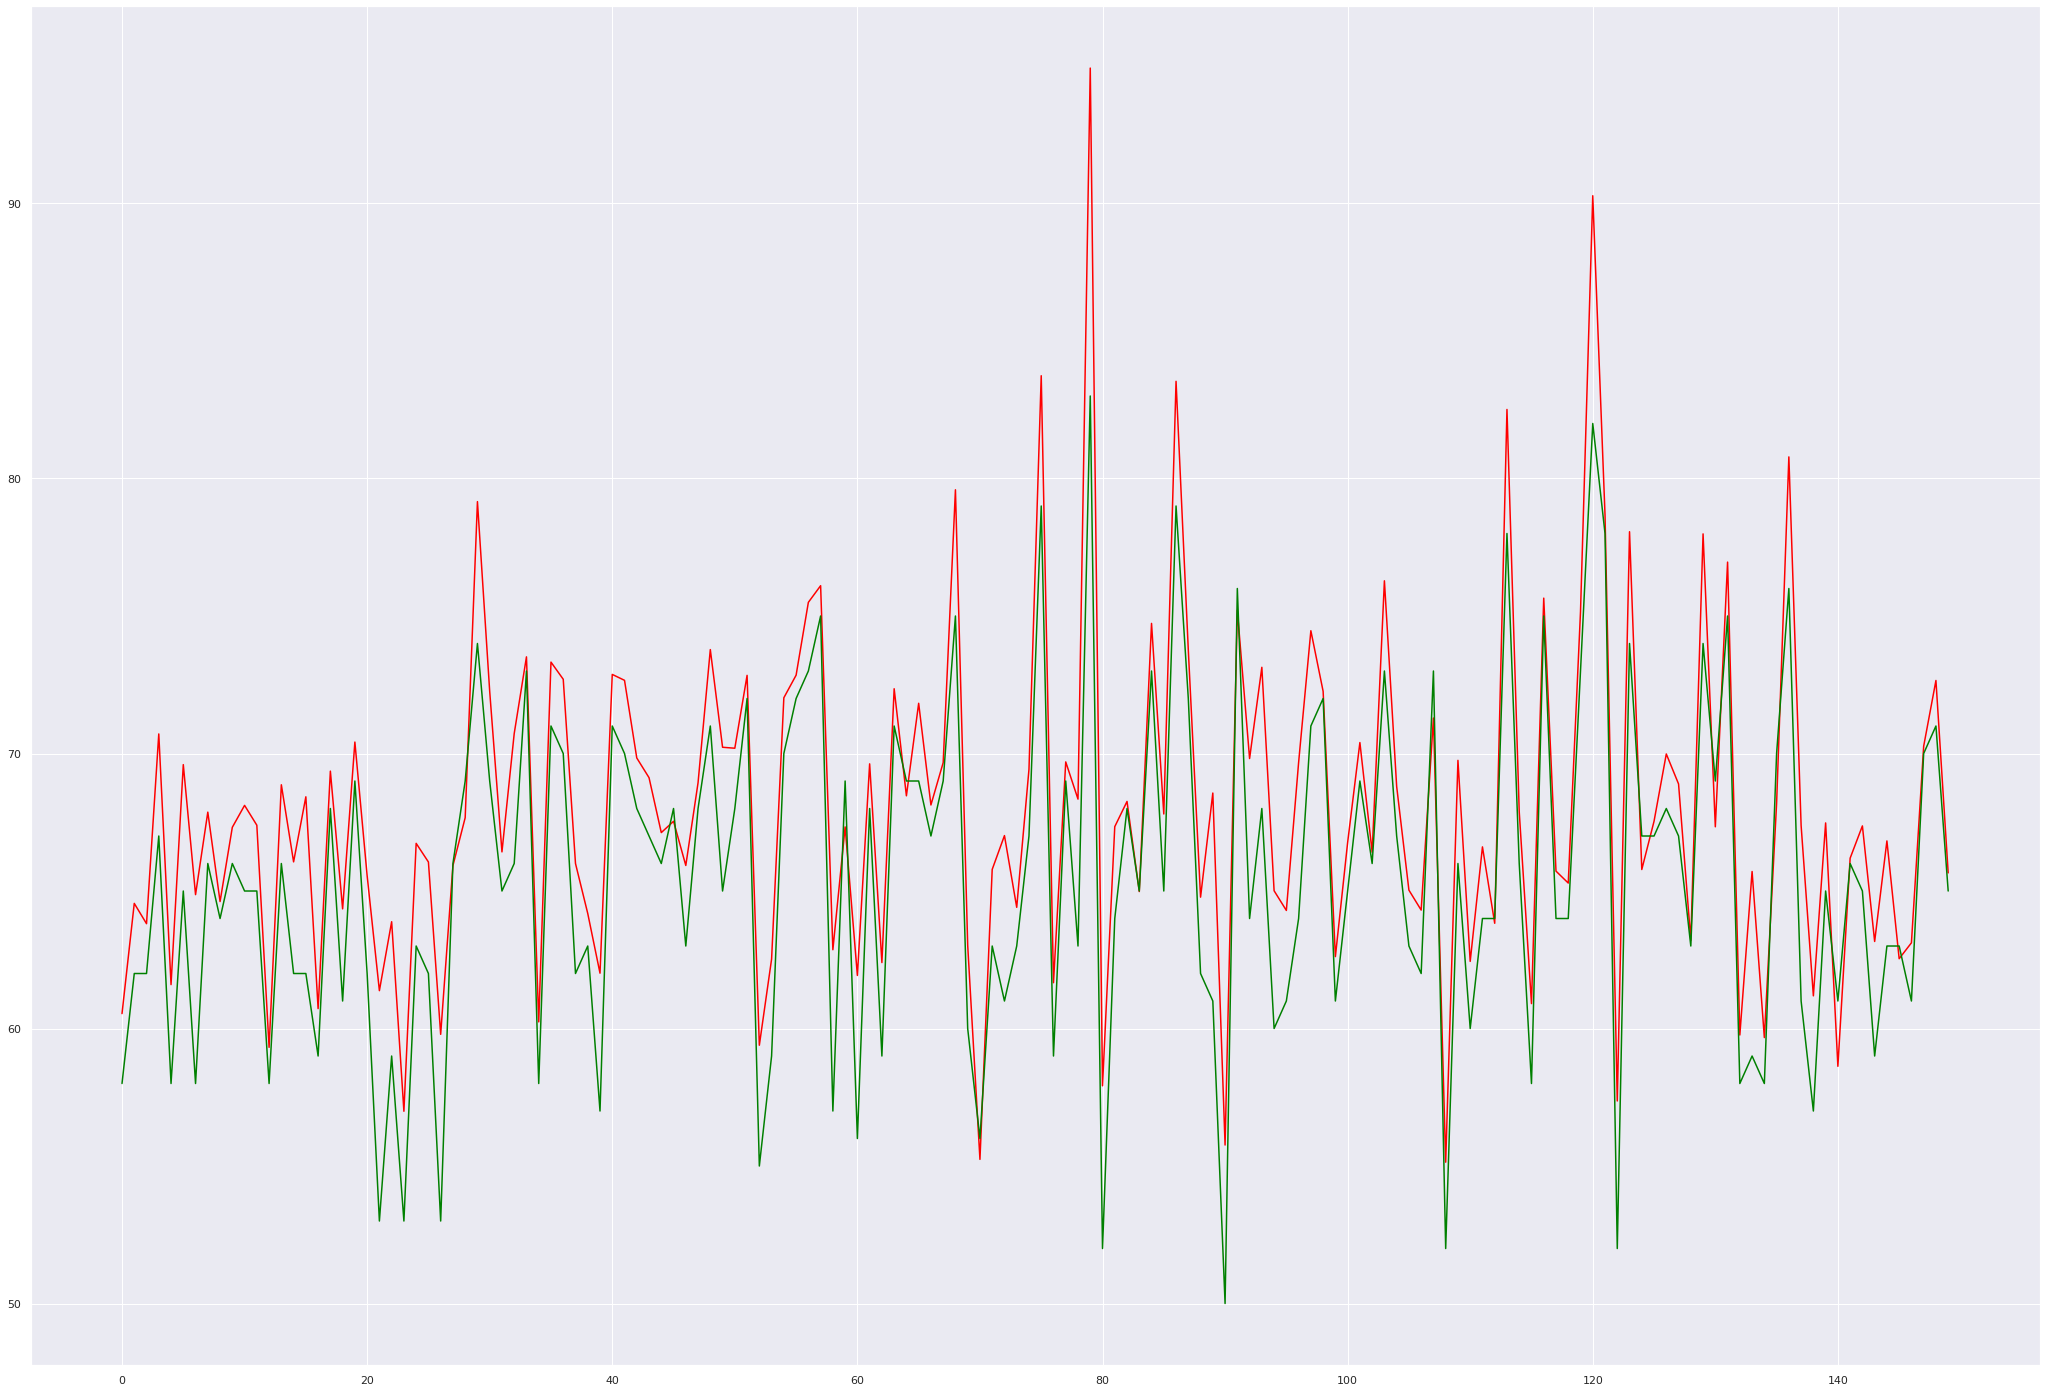

In [191]:
predictions = regressor.predict(x_test[:150])
plt.plot(predictions[:150],color="red")
plt.plot(y_test[:150],color="green")
plt.show()